In [10]:
from preprocessing import load_reviews
from experiments import run_experiment
from features import SentimentFeatures
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
import random

# Setup

In [11]:
seed = 42

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [12]:
train_df, test_df, val_df = load_reviews("word")
train_df.head()

2025-11-27 22:57:09.038436: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


,review,sentiment,units
0,This was an absolutely terrible movie. Don't b...,0,"[this, was, an, absolutely, terrible, movie, d..."
1,"I have been known to fall asleep during films,...",0,"[i, have, been, known, to, fall, asleep, durin..."
2,Mann photographs the Alberta Rocky Mountains i...,0,"[mann, photographs, the, alberta, rocky, mount..."
3,This is the kind of film for a snowy Sunday af...,1,"[this, is, the, kind, of, film, for, a, snowy,..."
4,"As others have mentioned, all the women that g...",1,"[as, others, have, mentioned, all, the, women,..."


In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['units'])

train_df["concept_ids"] = tokenizer.texts_to_sequences(train_df['units'])
test_df["concept_ids"] = tokenizer.texts_to_sequences(test_df['units'])

In [14]:
# Number of unique tokens in the tokenizer
num_unique_tokens = len(tokenizer.word_index)  # word_index maps token -> unique ID
print("Number of unique tokens:", num_unique_tokens)
train_df.head()

Number of unique tokens: 74127


,review,sentiment,units,concept_ids
0,This was an absolutely terrible movie. Don't b...,0,"[this, was, an, absolutely, terrible, movie, d...","[10, 13, 33, 412, 376, 17, 42, 12, 27, 10363, ..."
1,"I have been known to fall asleep during films,...",0,"[i, have, been, known, to, fall, asleep, durin...","[9, 24, 82, 545, 6, 775, 2314, 301, 107, 18, 1..."
2,Mann photographs the Alberta Rocky Mountains i...,0,"[mann, photographs, the, alberta, rocky, mount...","[3526, 6019, 1, 24047, 4744, 3902, 8, 3, 867, ..."
3,This is the kind of film for a snowy Sunday af...,1,"[this, is, the, kind, of, film, for, a, snowy,...","[10, 5, 1, 215, 4, 19, 15, 3, 8613, 2528, 2575..."
4,"As others have mentioned, all the women that g...",1,"[as, others, have, mentioned, all, the, women,...","[14, 389, 24, 1013, 29, 1, 342, 11, 137, 2452,..."


# Feature selection

In [15]:
an = SentimentFeatures()
an.fit(train_df["concept_ids"], train_df["sentiment"])

In [16]:
num_important_features = int(num_unique_tokens * 0.2)
train_df = an.add_top_features(train_df, n=num_important_features)
test_df  = an.add_top_features(test_df, n=num_important_features)

# Models

In [17]:
train_df.head()

,review,sentiment,units,concept_ids,concept_ids_positive_features,concept_ids_negative_features,concept_ids_important_features
0,This was an absolutely terrible movie. Don't b...,0,"[this, was, an, absolutely, terrible, movie, d...","[10, 13, 33, 412, 376, 17, 42, 12, 27, 10363, ...","[33, 8, 32, 1317, 453, 191, 87, 200, 67, 208, ...","[10, 13, 412, 376, 17, 42, 12, 27, 10363, 3190...","[10, 13, 33, 412, 376, 17, 42, 12, 27, 10363, ..."
1,"I have been known to fall asleep during films,...",0,"[i, have, been, known, to, fall, asleep, durin...","[9, 24, 82, 545, 6, 775, 2314, 301, 107, 18, 1...","[545, 301, 107, 5, 662, 3, 2175, 4, 563, 2209,...","[9, 24, 82, 6, 2314, 18, 10, 607, 6, 177, 64, ...","[9, 24, 82, 545, 6, 2314, 301, 107, 18, 10, 5,..."
2,Mann photographs the Alberta Rocky Mountains i...,0,"[mann, photographs, the, alberta, rocky, mount...","[3526, 6019, 1, 24047, 4744, 3902, 8, 3, 867, ...","[3526, 6019, 1, 4744, 3902, 8, 3, 867, 2, 1870...","[193, 31, 295, 6, 42, 18, 207, 23, 24048, 81, ...","[3526, 6019, 1, 4744, 3902, 8, 3, 867, 2, 1870..."
3,This is the kind of film for a snowy Sunday af...,1,"[this, is, the, kind, of, film, for, a, snowy,...","[10, 5, 1, 215, 4, 19, 15, 3, 8613, 2528, 2575...","[5, 1, 4, 19, 3, 8613, 2528, 2575, 53, 1, 4, 1...","[10, 215, 345, 69, 137, 21, 85, 3028, 357, 605...","[10, 5, 1, 215, 4, 19, 3, 8613, 2528, 2575, 53..."
4,"As others have mentioned, all the women that g...",1,"[as, others, have, mentioned, all, the, women,...","[14, 389, 24, 1013, 29, 1, 342, 11, 137, 2452,...","[14, 389, 1, 8, 19, 1456, 1, 54, 10589, 275, 1...","[24, 1013, 29, 342, 11, 137, 2452, 10, 22, 642...","[14, 389, 24, 1013, 29, 1, 342, 11, 137, 2452,..."


# TF-IDF

In [18]:
y_train = train_df["sentiment"]
y_test = test_df["sentiment"]

In [19]:
train_df["concept_ids"] = train_df["concept_ids"].apply(
    lambda x: " ".join(str(id) for id in x)
)
train_df.head()

train_df["concept_ids_positive_features"] = train_df["concept_ids_positive_features"].apply(
    lambda x: " ".join(str(id) for id in x)
)
train_df.head()

train_df["concept_ids_negative_features"] = train_df["concept_ids_negative_features"].apply(
    lambda x: " ".join(str(id) for id in x)
)
train_df.head()

train_df["concept_ids_important_features"] = train_df["concept_ids_important_features"].apply(
    lambda x: " ".join(str(id) for id in x)
)
train_df.head()

,review,sentiment,units,concept_ids,concept_ids_positive_features,concept_ids_negative_features,concept_ids_important_features
0,This was an absolutely terrible movie. Don't b...,0,"[this, was, an, absolutely, terrible, movie, d...",10 13 33 412 376 17 42 12 27 10363 8 32 1317 3...,33 8 32 1317 453 191 87 200 67 208 8 454 67 87...,10 13 412 376 17 42 12 27 10363 3190 40 10587 ...,10 13 33 412 376 17 42 12 27 10363 8 32 1317 3...
1,"I have been known to fall asleep during films,...",0,"[i, have, been, known, to, fall, asleep, durin...",9 24 82 545 6 775 2314 301 107 18 10 5 607 662...,545 301 107 5 662 3 2175 4 563 2209 2 3901 1 2...,9 24 82 6 2314 18 10 607 6 177 64 1420 111 23 ...,9 24 82 545 6 2314 301 107 18 10 5 607 662 6 3...
2,Mann photographs the Alberta Rocky Mountains i...,0,"[mann, photographs, the, alberta, rocky, mount...",3526 6019 1 24047 4744 3902 8 3 867 1562 2 187...,3526 6019 1 4744 3902 8 3 867 2 1870 1186 2 22...,193 31 295 6 42 18 207 23 24048 81 14001 6 402...,3526 6019 1 4744 3902 8 3 867 2 1870 1186 2 22...
3,This is the kind of film for a snowy Sunday af...,1,"[this, is, the, kind, of, film, for, a, snowy,...",10 5 1 215 4 19 15 3 8613 2528 2575 53 1 345 4...,5 1 4 19 3 8613 2528 2575 53 1 4 1 172 1378 16...,10 215 345 69 137 21 85 3028 357 605 112 38 22...,10 5 1 215 4 19 3 8613 2528 2575 53 1 345 4 1 ...
4,"As others have mentioned, all the women that g...",1,"[as, others, have, mentioned, all, the, women,...",14 389 24 1013 29 1 342 11 137 2452 8 10 19 22...,14 389 1 8 19 1456 1 54 10589 275 1 4 1 53 321...,24 1013 29 342 11 137 2452 10 22 642 412 112 6...,14 389 24 1013 29 1 342 11 137 2452 8 10 19 22...


In [20]:
test_df["concept_ids"] = test_df["concept_ids"].apply(
    lambda x: " ".join(str(id) for id in x)
)
test_df.head()

test_df["concept_ids_positive_features"] = test_df["concept_ids_positive_features"].apply(
    lambda x: " ".join(str(id) for id in x)
)
test_df.head()

test_df["concept_ids_negative_features"] = test_df["concept_ids_negative_features"].apply(
    lambda x: " ".join(str(id) for id in x)
)
test_df.head()

test_df["concept_ids_important_features"] = test_df["concept_ids_important_features"].apply(
    lambda x: " ".join(str(id) for id in x)
)
test_df.head()

,review,sentiment,units,concept_ids,concept_ids_positive_features,concept_ids_negative_features,concept_ids_important_features
15072,The latest film by the Spanish director Agusti...,1,"[the, latest, film, by, the, spanish, director...",1 2430 19 32 1 1833 153 36791 20689 5 3 2032 2...,1 19 32 1 1833 36791 20689 5 3 2032 408 559 2 ...,153 23 88 11 542 2873 85 11 338 4825 7747 6 16...,1 19 32 1 1833 153 36791 20689 5 3 2032 23 88 ...
9987,"As others have mentioned, this movie is simila...",0,"[as, others, have, mentioned, this, movie, is,...",14 389 24 1013 10 17 5 701 6 1 2174 191 2015 2...,14 389 5 701 1 191 2015 2 1 2859 545 1588 1 18...,24 1013 10 17 6 2174 482 5904 11 99 68 91 81 4...,14 389 24 1013 10 17 5 701 6 1 2174 191 2015 2...
24558,"I have no idea how to describe this movie, and...",1,"[i, have, no, idea, how, to, describe, this, m...",9 24 58 311 88 6 1604 10 17 2 84 48 115 6 1709...,2 84 115 389 1 305 16 1822 4 487 4171 84 2675 ...,9 24 58 311 88 6 1604 10 17 48 6 166 9 65 7 58...,9 24 58 311 88 6 1604 10 17 2 84 48 115 6 389 ...
2571,"Ah, I loved this movie. I think it had it all....",1,"[ah, i, loved, this, movie, i, think, it, had,...",3659 9 432 10 17 9 102 7 65 7 29 7 91 71 442 4...,432 3 4 203 3 36 3 20 1926 5 3 6692 8 109 726 ...,3659 9 10 17 9 102 7 65 7 29 7 91 71 442 45 12...,3659 9 432 10 17 9 102 7 65 7 29 7 91 71 442 4...
16059,Brilliant movie. The drawings were just amazin...,1,"[brilliant, movie, the, drawings, were, just, ...",507 17 1 8043 68 41 459 97 80 7 1021 157 7 703...,507 1 459 7031 151 3,17 68 41 97 80 7 1021 7 9 4424 725 18,507 17 1 68 41 459 97 80 7 1021 7 7031 9 4424 ...


In [21]:
# Main concept IDs
tfidf_main = TfidfVectorizer(max_features=50000, ngram_range=(1, 3), min_df=2, max_df=0.8)
X_all_train = tfidf_main.fit_transform(train_df["concept_ids"])
X_all_test  = tfidf_main.transform(test_df["concept_ids"])

# Positive features
tfidf_pos = TfidfVectorizer(max_features=50000, ngram_range=(1, 3), min_df=2, max_df=0.8)
X_pos_train = tfidf_pos.fit_transform(train_df["concept_ids_positive_features"])
X_pos_test  = tfidf_pos.transform(test_df["concept_ids_positive_features"])

# Negative features
tfidf_neg = TfidfVectorizer(max_features=50000, ngram_range=(1, 3), min_df=2, max_df=0.8)
X_neg_train = tfidf_neg.fit_transform(train_df["concept_ids_negative_features"])
X_neg_test  = tfidf_neg.transform(test_df["concept_ids_negative_features"])

# Important features
tfidf_imp = TfidfVectorizer(max_features=50000, ngram_range=(1, 3), min_df=2, max_df=0.8)
X_imp_train = tfidf_neg.fit_transform(train_df["concept_ids_important_features"])
X_imp_test = tfidf_neg.transform(test_df["concept_ids_important_features"])

In [22]:
# Prepare data in the required dictionary format
X_sets_train = {
    'all': X_all_train,
    'pos': X_pos_train, 
    'neg': X_neg_train,
    'important': X_imp_train
}

X_sets_test = {
    'all': X_all_test,
    'pos': X_pos_test,
    'neg': X_neg_test,
    'important': X_imp_test
}

# Verify shapes
print("\nData shapes:")
for key in X_sets_train:
    print(f"Train {key}: {X_sets_train[key].shape}")
for key in X_sets_test:
    print(f"Test {key}: {X_sets_test[key].shape}")

print(f"\nLabel shapes: y_train {y_train.shape}, y_test {y_test.shape}")


Data shapes:
Train all: (25000, 50000)
Train pos: (25000, 50000)
Train neg: (25000, 50000)
Train important: (25000, 50000)
Test all: (20000, 50000)
Test pos: (20000, 50000)
Test neg: (20000, 50000)
Test important: (20000, 50000)

Label shapes: y_train (25000,), y_test (20000,)


## Linear-SVM

LinearSVM 'all' initialized with C=1.0
LinearSVM 'all' trained.

=== ALL EVALUATION ===
Accuracy: 0.9969
              precision    recall  f1-score   support

           0     0.9961    0.9976    0.9969     10000
           1     0.9976    0.9961    0.9968     10000

    accuracy                         0.9969     20000
   macro avg     0.9969    0.9969    0.9968     20000
weighted avg     0.9969    0.9969    0.9968     20000


=== ALL MODEL ===
Accuracy: 0.9969


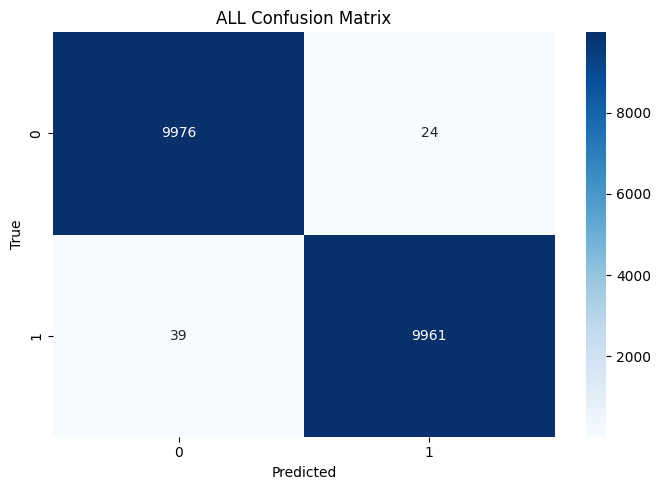

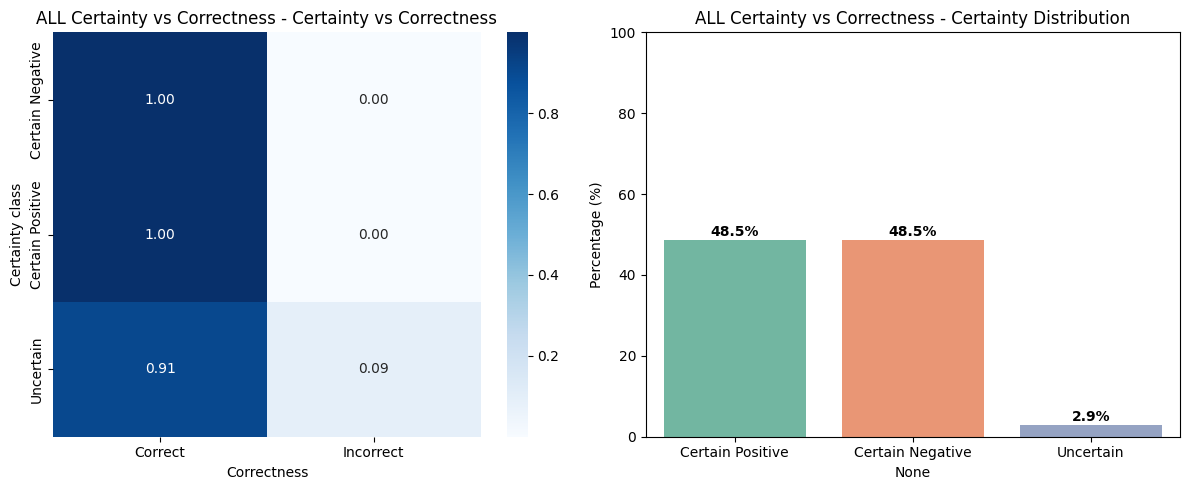


ALL MODEL - Unsure Predictions (probability near 0.3-0.7):
Probability [0.61], Label [1]: "Some films just simply should not be remade. This is one of them. In and of itself it is not a bad film. But it fails to capture the flavor and the terror of the 1963 film of the same title. Liam Neeson was excellent as he always is, and most of the cast holds up, with the exception of Owen Wilson, who just did not bring the right feel to the character of Luke. But the major fault with this version is that it strayed too far from the Shirley Jackson story in it's attempts to be grandiose and lost some of the thrill of the earlier film in a trade off for snazzier special effects. Again I will say that in and of itself it is not a bad film. But you will enjoy the friction of terror in the older version much more."
Probability [0.43], Label [0]: "The 1930' were a golden age of Los Angeles with its film industry and great potential of various other possibilities to become rich and famous and happy. 

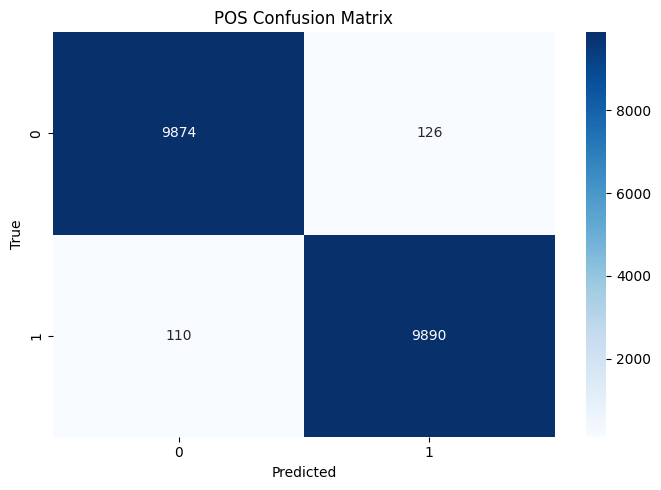

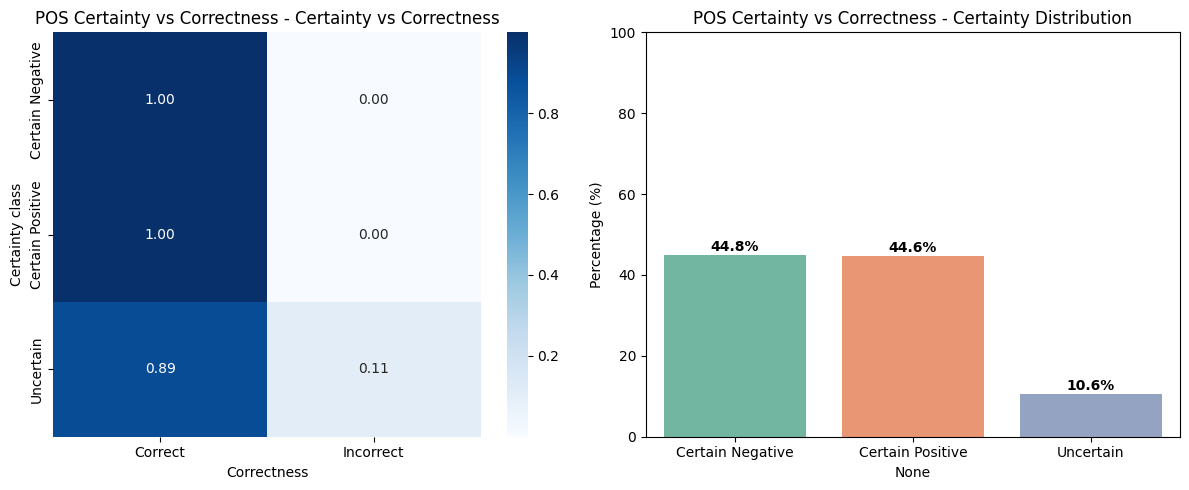


POS MODEL - Unsure Predictions (probability near 0.3-0.7):
Probability [0.53], Label [1]: "I have no idea how to describe this movie, and also would love to provide others the same opportunity I had - seeing it with no prior knowledge of what to expect. I enjoyed it immensely but can also say I barely understood what was going on, if in fact there was anything to understand in the first place. Fans of David Lynch (tangentially) or especially Guy Maddin films should particularly enjoy this, and any fans of the comic book EIGHTBALL will probably be beside themselves with joy and wonder (it came as close as any film I've seen to the tone and mood Dan Clowes creates so effectively).<br /><br />One slight note just to warn anyone easily offended - this movie, if rated, would be NC-17 for sure. Fans of male full-frontal nudity, however...hmm, well...yes. This is weird wild stuff."
Probability [0.67], Label [1]: "Ah, I loved this movie. I think it had it all. It made me laugh out loud over a

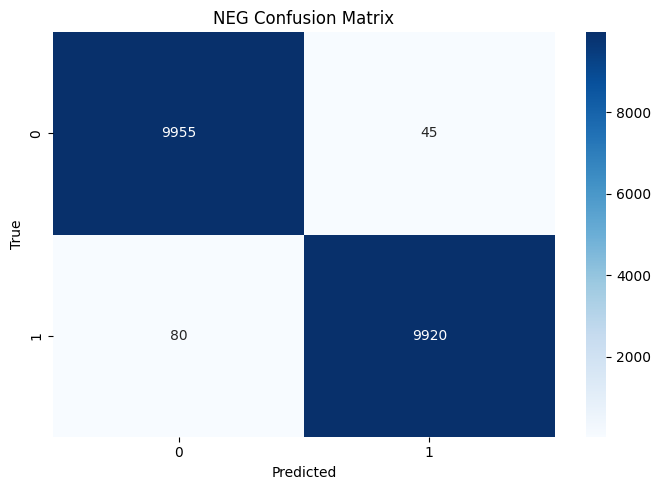

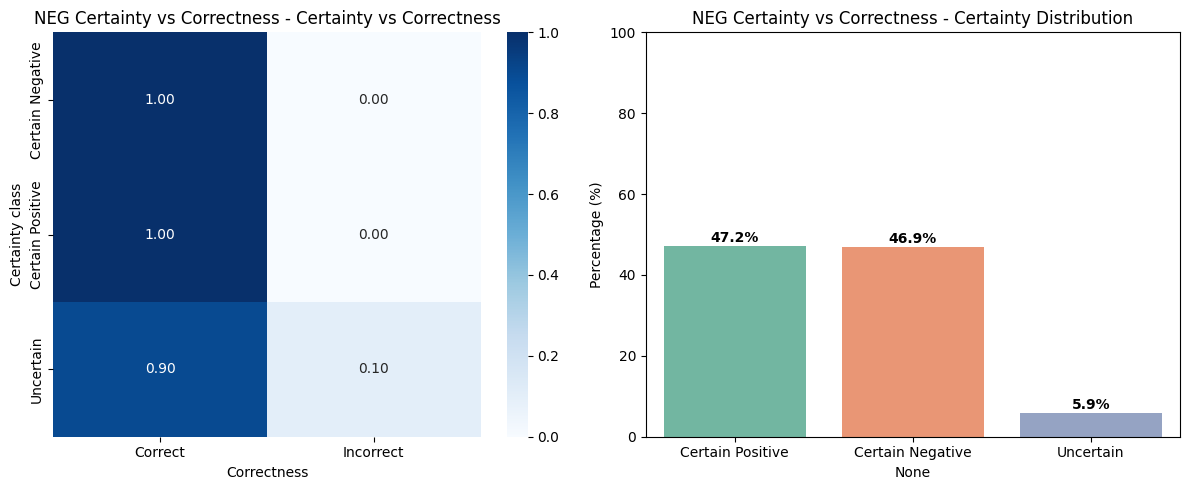


NEG MODEL - Unsure Predictions (probability near 0.3-0.7):
Probability [0.61], Label [1]: "I have no idea how to describe this movie, and also would love to provide others the same opportunity I had - seeing it with no prior knowledge of what to expect. I enjoyed it immensely but can also say I barely understood what was going on, if in fact there was anything to understand in the first place. Fans of David Lynch (tangentially) or especially Guy Maddin films should particularly enjoy this, and any fans of the comic book EIGHTBALL will probably be beside themselves with joy and wonder (it came as close as any film I've seen to the tone and mood Dan Clowes creates so effectively).<br /><br />One slight note just to warn anyone easily offended - this movie, if rated, would be NC-17 for sure. Fans of male full-frontal nudity, however...hmm, well...yes. This is weird wild stuff."
Probability [0.43], Label [0]: "Let's start by the simple lines. From the viewer's side, there a couple of good

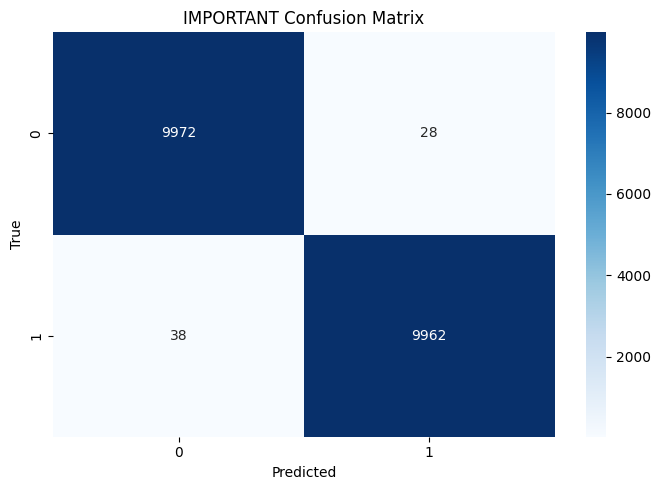

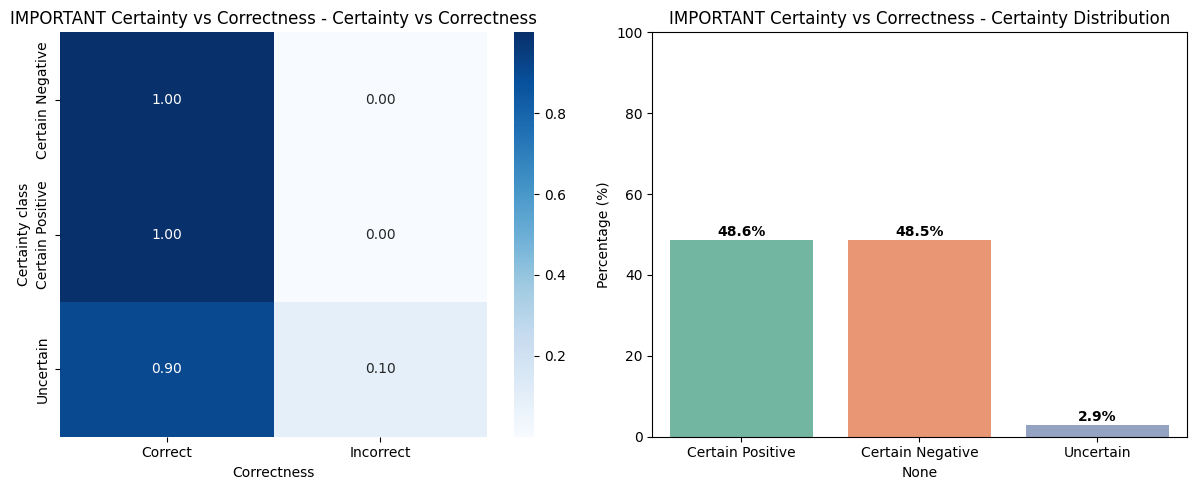


IMPORTANT MODEL - Unsure Predictions (probability near 0.3-0.7):
Probability [0.57], Label [1]: "Some films just simply should not be remade. This is one of them. In and of itself it is not a bad film. But it fails to capture the flavor and the terror of the 1963 film of the same title. Liam Neeson was excellent as he always is, and most of the cast holds up, with the exception of Owen Wilson, who just did not bring the right feel to the character of Luke. But the major fault with this version is that it strayed too far from the Shirley Jackson story in it's attempts to be grandiose and lost some of the thrill of the earlier film in a trade off for snazzier special effects. Again I will say that in and of itself it is not a bad film. But you will enjoy the friction of terror in the older version much more."
Probability [0.39], Label [0]: "The 1930' were a golden age of Los Angeles with its film industry and great potential of various other possibilities to become rich and famous and h

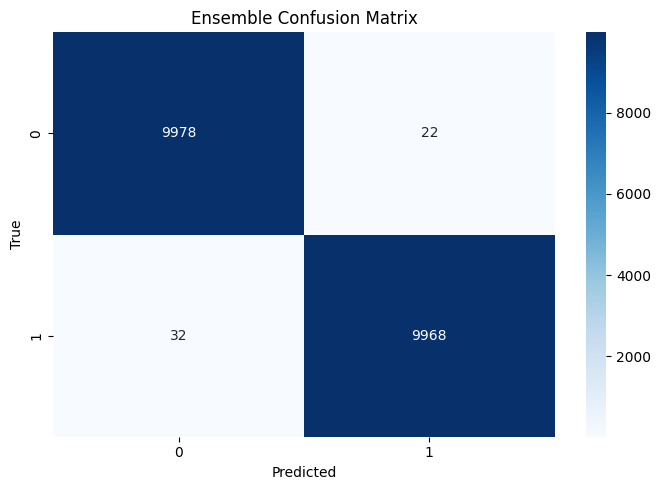

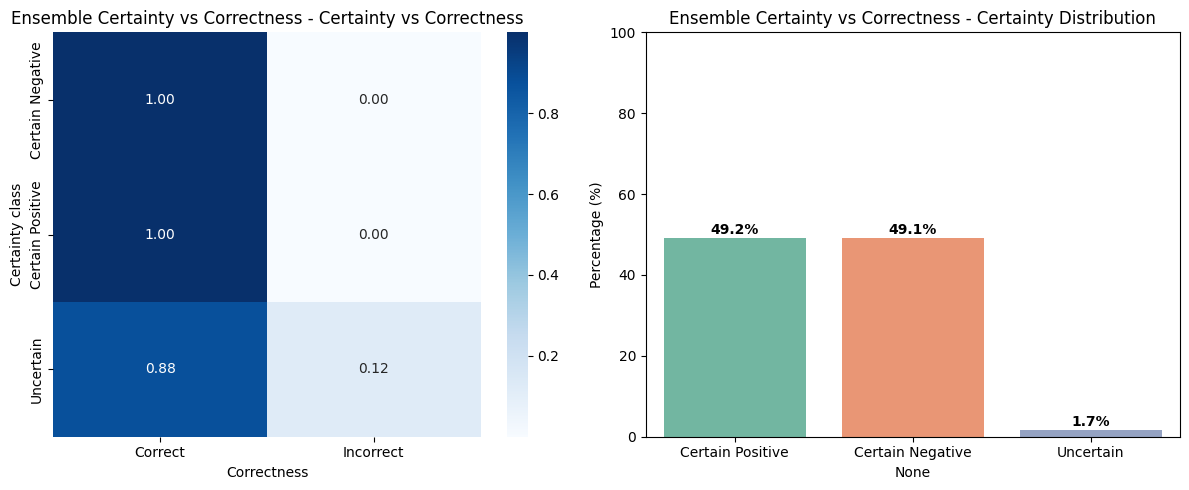


ENSEMBLE - Unsure Predictions (probability near 0.3-0.7):
Probability [0.61], Label [1]: "Some films just simply should not be remade. This is one of them. In and of itself it is not a bad film. But it fails to capture the flavor and the terror of the 1963 film of the same title. Liam Neeson was excellent as he always is, and most of the cast holds up, with the exception of Owen Wilson, who just did not bring the right feel to the character of Luke. But the major fault with this version is that it strayed too far from the Shirley Jackson story in it's attempts to be grandiose and lost some of the thrill of the earlier film in a trade off for snazzier special effects. Again I will say that in and of itself it is not a bad film. But you will enjoy the friction of terror in the older version much more."
Probability [0.33], Label [0]: "Cynthia Rothrock,(China O'Brien),"Manhattan Chase",2000, made this film enjoyable to watch and of course,e this cute petite gal burned up the screen with h

In [23]:
results = run_experiment(X_sets_train, y_train, X_sets_test, y_test, test_df["review"], "linear-svm")